# Bivariate/Multivariate Analysis

In [2]:
import pandas as pd

import seaborn as sns

tips = sns.load_dataset('tips')
titanic  = pd.read_csv('titanic_dataset_train.csv')
flights = sns.load_dataset('flights')
iris = sns.load_dataset('iris')

### 1. Scatter plot (Numerical - Numerical)

In [19]:
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
165,24.52,3.48,Male,No,Sun,Dinner,3
9,14.78,3.23,Male,No,Sun,Dinner,2
2,21.01,3.50,Male,No,Sun,Dinner,3
52,34.81,5.20,Female,No,Sun,Dinner,4
134,18.26,3.25,Female,No,Thur,Lunch,2
152,17.26,2.74,Male,No,Sun,Dinner,3
107,25.21,4.29,Male,Yes,Sat,Dinner,2
195,7.56,1.44,Male,No,Thur,Lunch,2
184,40.55,3.00,Male,Yes,Sun,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

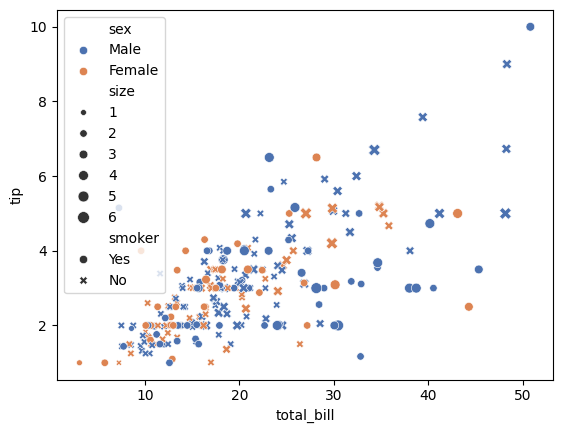

In [39]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex", style='smoker', palette="deep", size=tips["size"])   

### 2. Barplot (Numerical - Categorical)

In [40]:
titanic.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
479,480,1,3,"Hirvonen, Miss. Hildur E",female,2.00,0,1,3101298,12.2875,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.00,0,0,3101296,7.9250,NaN,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S
845,846,0,3,"Abbing, Mr. Anthony",male,42.00,0,0,C.A. 5547,7.5500,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
860,861,0,3,"Hansen, Mr. Claus Peter",male,41.00,2,0,350026,14.1083,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.00,0,0,7540,8.6542,NaN,S
470,471,0,3,"Keefe, Mr. Arthur",male,NaN,0,0,323592,7.2500,NaN,S


<Axes: xlabel='Pclass', ylabel='Age'>

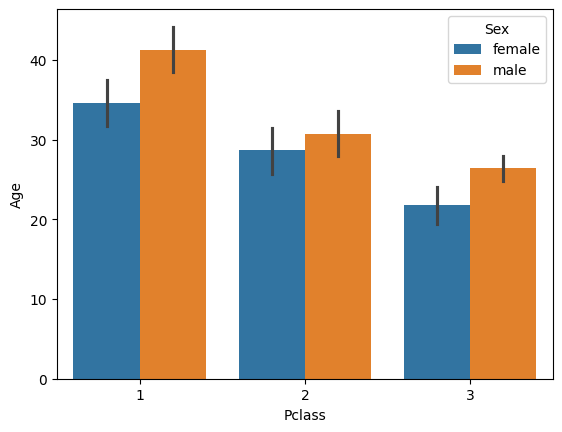

In [44]:
sns.barplot(data=titanic, x="Pclass", y="Age", hue='Sex')

### 3. Boxplot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

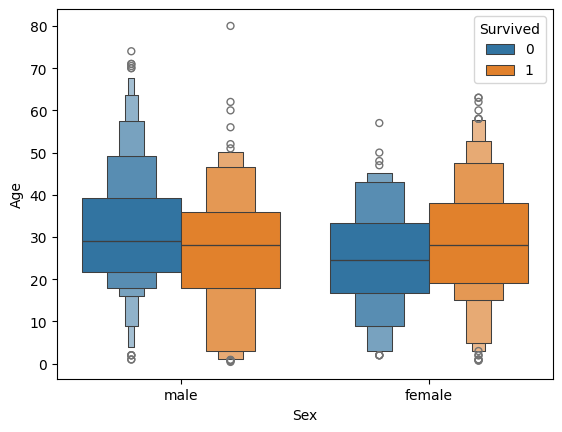

In [50]:
sns.boxenplot(data=titanic,x="Sex",y="Age", hue='Survived')

### 4. Distplot (Numerical - Categorical)

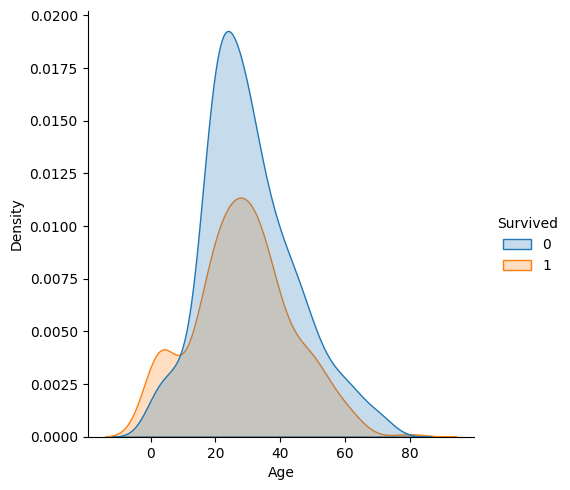

In [77]:
sns.displot(
    data=titanic,
    x='Age',
    hue='Survived',
    kind='kde',
    fill=True,
)


### 5. Heatmap (categorical - categorical)

In [84]:
pd.crosstab(titanic['Embarked'], titanic['Sex'])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


<Axes: xlabel='Sex', ylabel='Embarked'>

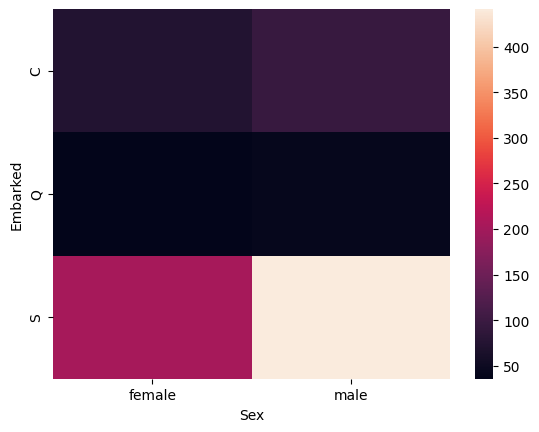

In [86]:
sns.heatmap(pd.crosstab(titanic['Embarked'], titanic['Sex']))

### 6. ClusterMap (Categorical - Categorical)

In [88]:
pd.crosstab(titanic['SibSp'], titanic['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


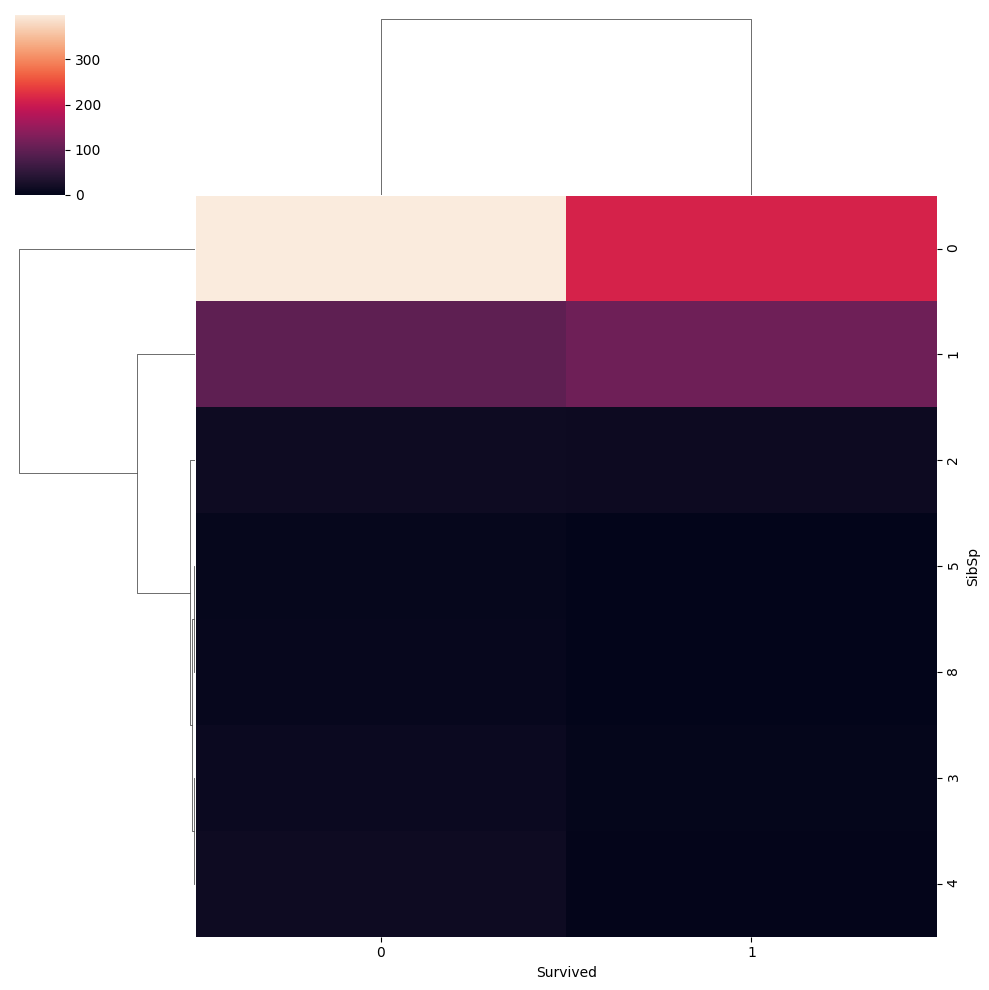

In [89]:
sns.clustermap(pd.crosstab(titanic['SibSp'], titanic['Survived']))

### 7. Pairplot

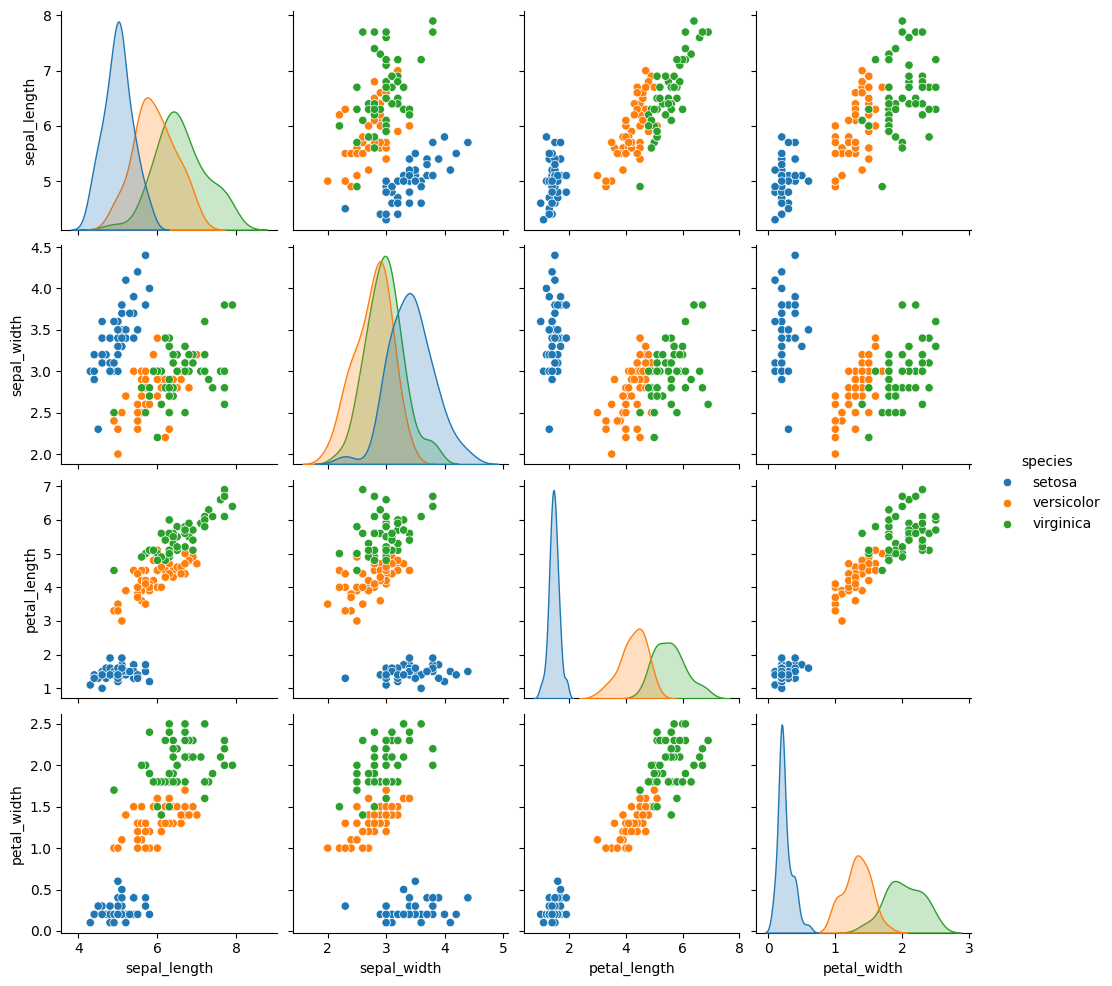

In [91]:
sns.pairplot(iris, hue='species')

### 8. Lineplot (Numerical - Numerical)

In [92]:
flights.sample(10)

,year,month,passengers
124,1959,May,420
65,1954,Jun,264
9,1949,Oct,119
47,1952,Dec,194
142,1960,Nov,390
14,1950,Mar,141
11,1949,Dec,118
126,1959,Jul,548
120,1959,Jan,360
83,1955,Dec,278


In [108]:
new=flights.groupby('year').sum(numeric_only='True').reset_index()
new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<Axes: xlabel='year', ylabel='passengers'>

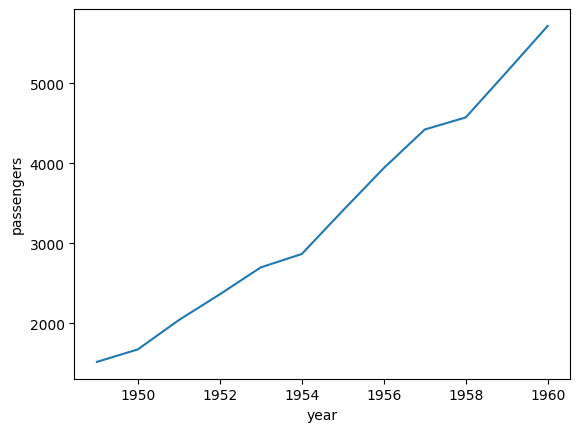

In [111]:
sns.lineplot(
    data=new, 
    x='year',
    y='passengers'
)

In [ ]:
flights.pivot_table(
    values='passengers',
    index='month',
    columns='year',
    observed=False
)

C:\Users\Ayush\AppData\Local\Temp\ipykernel_16280\3083181104.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

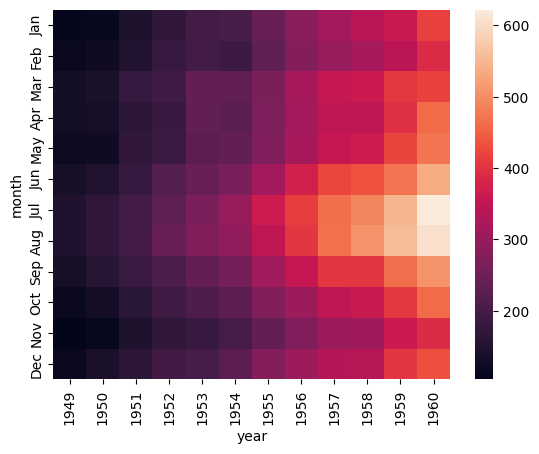

In [119]:
sns.heatmap(flights.pivot_table(
    values='passengers',
    index='month',
    columns='year',
    observed=False
))